# A major tool in Computational Linear Algebra (aka Numerical Linear Algebra): the SVD

### SDV = Singular Value Decomposition

### Remember  that a square (real) matrices of size (n,n) can 
### be "eigendecomposed"  :

In [13]:
%%latex
$$A = V . Diag(\Lambda). V^T $$
# Diag(\Lambda) is the SPECTRUM

<IPython.core.display.Latex object>

In [2]:
%%latex 
With $V$: eigenvectors 
; $Diag(\Lambda)$: eigenvalues (on the diagonal)

<IPython.core.display.Latex object>

### But with A (for example) non square  of size (n,m)
### We need to use the  Singular Value Decomposition aka as SVD

### Let A be a matrix of size (n,m) with  n != m
### the SVD of A is defined by

In [3]:
%%latex
$$A= U . S . V^T $$  

<IPython.core.display.Latex object>

### Where: 
#### U: size (n,n), square, orthogonal
#### V: size (m,m), square, orthogonal
#### S: size (n,m), rectangular if n!= m


In [4]:
%%latex
A trick to remember:  $$(n,n) * (n,m) * (m,m) "=" (n,m) $$


<IPython.core.display.Latex object>

#### Orthogonal ?  Remainder: 

In [7]:
%%latex
$$U . U^T= I_n$$
$$V . V^T= I_m$$

<IPython.core.display.Latex object>

#### The values on the "diagonal" of S are called: singular values
#### The columns of U are called the left-singular vectors
#### The columns of V are called the right-singular vectors

### Intuition
#### A is a linear transformation with
#### U: a rotation
#### s: a rescaling
#### V: another rotation

# Some properties

##### Theorem: Every (real or complex) matrix A of size (n,m)  has a singular value decomposition.  The singular values {si} are uniquely determined, with {ui} and {vi} the, respectively, left and rigth singular vectors (uniquely determined up to real (or complex) signs.
##### Remark: the SVD is a matrix factorization algorithm, there are numerous others: QR, LR, L D U, etc ....

##### Theorem: the rank of a matrix A , rank(A) , is the number of nonzero singular values

##### Remark: the singular values are generally sorted by decreasing order

### An example

In [5]:
import numpy as np

A = np.array([[1, 1, 1],
              [3, 4, 5],
              [4, 4, 4],                            
              [4, 5, 4]                      
              ])
n,m=A.shape
print("n= ",n,"ligns ,  m=" ,m, "columns")
print(A)

n=  4 ligns ,  m= 3 columns
[[1 1 1]
 [3 4 5]
 [4 4 4]
 [4 5 4]]


#### Question:  what do you think of this matrix ?

In [6]:
print("--- SVD  ---")
U, s, VT = np.linalg.svd(A, full_matrices=True)

--- SVD  ---


In [7]:
print("Rank of the matrix A:", np.linalg.matrix_rank(A))

Rank of the matrix A: 3


In [8]:
print("U:\n {}".format(U) )
print("s:\n {}".format(s) )
print("VT:\n {}".format(VT) )

U:
 [[-1.38201662e-01 -6.54749524e-02 -1.88246808e-01 -9.70142500e-01]
 [-5.59976765e-01  8.18823566e-01  1.26309104e-01 -1.33226763e-15]
 [-5.52806648e-01 -2.61899810e-01 -7.52987231e-01  2.42535625e-01]
 [-6.01440881e-01 -5.06605850e-01  6.17753494e-01 -1.11022302e-15]]
s:
 [12.49789499  1.23098537  0.53599988]
VT:
 [[-0.51489647 -0.60782554 -0.60450785]
 [-0.55486191 -0.30122956  0.77549276]
 [-0.65345993  0.73471687 -0.1821572 ]]


In [10]:
# Be careful when you use the @ operator
print(U @ np.diag(s) @ VT)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

#### Oups: Numpy returns a "vector" of SV: we need a matrix, but we can "correct" it !

In [11]:
print(U.shape[0])
print(U.shape[1])

4
4


In [12]:
print(V.shape[0])
print(VT.shape[1])

NameError: name 'V' is not defined

In [13]:
## We create a matrix of the correct zize
True_s = np.zeros((U.shape[1], VT.shape[0]))
# Now True_s is of size (4,4)

In [14]:
## we verify:
print(True_s.shape)

(4, 3)


In [15]:
## We "add" the singular values
True_s[:s.size, :s.size] = np.diag(s)
## Now it's ok: we verify
print(" This is the 'true' matrix of singular value")
print(True_s)

 This is the 'true' matrix of singular value
[[12.49789499  0.          0.        ]
 [ 0.          1.23098537  0.        ]
 [ 0.          0.          0.53599988]
 [ 0.          0.          0.        ]]


In [16]:
## We can verify numerically if it is correct
np.allclose(U.dot(True_s).dot(VT), A)
print( U @ True_s @ VT)

[[1. 1. 1.]
 [3. 4. 5.]
 [4. 4. 4.]
 [4. 5. 4.]]


In [17]:
## We compute the norm of the difference 
print("It's ok:", np.linalg.norm(U @ True_s @ VT - A))

It's ok: 7.482277218026854e-15


In [304]:
import numpy as np

A = np.array([[1, 1, 1, 0, 1],
              [3, 4, 5, 1, 0],
              [4, 4, 4, 0, 1],                            
              [4, 5, 4, 1, 1],                            
              [4, 6, 4, 0, 1],                            
              [4, 7, 4, 1, 1],                            
              [4, 8, 4, 0, 1],                            
              [4, 9, 4, 1, 0],                            
              ])
n,m=A.shape
print("n= ",n,",  m=" ,m)

n=  8 ,  m= 5


In [305]:
# set numpy printing options
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)

In [306]:
print("--- SVD  ---")
U, s, VT = np.linalg.svd(A, full_matrices=True)

--- SVD  ---


In [ ]:
print("U:\n {}".format(U) )
print("s:\n {}".format(s) )
print("VT:\n {}".format(VT) )

In [307]:
print(U @ np.diag(s) @ VT)

U:
 [[-0.078   0.153  -0.353   0.2288  0.577  -0.4217 -0.3463  0.4036]
 [-0.3009  0.5206  0.6794 -0.2518  0.3368  0.      0.      0.    ]
 [-0.3006  0.4636 -0.3274 -0.2203 -0.4895  0.1174  0.1115  0.5227]
 [-0.3365  0.2831 -0.0424  0.5822 -0.2177 -0.4104  0.2985 -0.4011]
 [-0.3666  0.075  -0.3016 -0.308  -0.0654  0.0702 -0.608  -0.5434]
 [-0.4026 -0.1055 -0.0166  0.4945  0.2064  0.7267 -0.0388  0.0984]
 [-0.4326 -0.3135 -0.2759 -0.3957  0.3588 -0.0822  0.5831 -0.0802]
 [-0.4649 -0.5435  0.3707  0.0284 -0.3019 -0.3163 -0.2597  0.3027]]
s:
 [22.577   3.3514  1.9084  1.0041  0.6297]
VT:
 [[-0.4516 -0.7454 -0.4783 -0.0667 -0.0849]
 [ 0.3437 -0.6511  0.6544  0.0462  0.1658]
 [-0.3601  0.0246  0.3519  0.5194 -0.69  ]
 [ 0.1976 -0.044  -0.3039  0.8499  0.38  ]
 [-0.7136  0.1335  0.3562  0.0376  0.5871]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 8)

In [308]:
 U, s, VT = np.linalg.svd(A)
True_s = np.zeros((U.shape[1], VT.shape[0]))
True_s[:s.size, :s.size] = np.diag(s)
print(True_s)
np.allclose(U.dot(True_s).dot(VT), A)


[[22.577   0.      0.      0.      0.    ]
 [ 0.      3.3514  0.      0.      0.    ]
 [ 0.      0.      1.9084  0.      0.    ]
 [ 0.      0.      0.      1.0041  0.    ]
 [ 0.      0.      0.      0.      0.6297]
 [ 0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.    ]]


True

In [309]:
# Low Rank Approximation
for i in range(1, m+1, 1):
    Asi = np.matrix(U[:, :i]) @ np.diag(s[:i]) @ np.matrix(VT[:i,:])
    print(" i",i, "Asi")
    print(Asi)

 i 1 Asi
[[0.7949 1.3121 0.8419 0.1173 0.1495]
 [3.0685 5.0648 3.2496 0.4529 0.5769]
 [3.0647 5.0585 3.2456 0.4523 0.5762]
 [3.4314 5.6638 3.634  0.5065 0.6451]
 [3.738  6.1698 3.9586 0.5517 0.7028]
 [4.1047 6.7751 4.347  0.6059 0.7717]
 [4.4113 7.2811 4.6717 0.6511 0.8293]
 [4.7397 7.8232 5.0194 0.6996 0.8911]]
 i 2 Asi
[[0.9712 0.9782 1.1775 0.141  0.2345]
 [3.6682 3.9287 4.3914 0.5335 0.8663]
 [3.5988 4.0468 4.2624 0.5241 0.8339]
 [3.7576 5.046  4.2549 0.5503 0.8025]
 [3.8244 6.006  4.1232 0.5633 0.7445]
 [3.9832 7.0053 4.1157 0.5895 0.7131]
 [4.0501 7.9653 3.984  0.6026 0.6551]
 [4.1135 9.0092 3.8274 0.6155 0.589 ]]
 i 3 Asi
[[ 1.2138  0.9616  0.9404 -0.2089  0.6994]
 [ 3.2013  3.9606  4.8476  1.2069 -0.0284]
 [ 3.8238  4.0314  4.0426  0.1996  1.265 ]
 [ 3.7867  5.044   4.2265  0.5083  0.8583]
 [ 4.0317  5.9919  3.9207  0.2644  1.1417]
 [ 3.9946  7.0045  4.1046  0.5731  0.735 ]
 [ 4.2397  7.9523  3.7988  0.3292  1.0184]
 [ 3.8587  9.0266  4.0764  0.9829  0.1008]]
 i 4 Asi
[[ 1.2592

In [310]:
# the reduced or truncated SVD operation can save time by ignoring all the
# extremly small (or exactly zero) values. A good blog post explaing the benefits
# can be found here:
# http://blog.explainmydata.com/2016/01/how-much-faster-is-truncated-svd.html
print("--- REDUCED ---")

      
U3, s3, V3T = np.linalg.svd(A, full_matrices=False)

print("U3:\n {}".format(U3))
print("s3:\n {}".format(s3))
print("V3T:\n {}".format(V3T))

--- REDUCED ---
U3:
 [[-0.078   0.153  -0.353   0.2288  0.577 ]
 [-0.3009  0.5206  0.6794 -0.2518  0.3368]
 [-0.3006  0.4636 -0.3274 -0.2203 -0.4895]
 [-0.3365  0.2831 -0.0424  0.5822 -0.2177]
 [-0.3666  0.075  -0.3016 -0.308  -0.0654]
 [-0.4026 -0.1055 -0.0166  0.4945  0.2064]
 [-0.4326 -0.3135 -0.2759 -0.3957  0.3588]
 [-0.4649 -0.5435  0.3707  0.0284 -0.3019]]
s3:
 [22.577   3.3514  1.9084  1.0041  0.6297]
V3T:
 [[-0.4516 -0.7454 -0.4783 -0.0667 -0.0849]
 [ 0.3437 -0.6511  0.6544  0.0462  0.1658]
 [-0.3601  0.0246  0.3519  0.5194 -0.69  ]
 [ 0.1976 -0.044  -0.3039  0.8499  0.38  ]
 [-0.7136  0.1335  0.3562  0.0376  0.5871]]


In [85]:
E=U3 @ np.diag(s3) @ V3T
print("E")
print(E)
Z=E-A
print("Z=(E-A)*10^15")
print(Z*10**15)
print("Norm of the difference:", np.linalg.norm(Z))
print("Rank of A:", np.linalg.matrix_rank(A))

E
[[ 1.  1.  1. -0.  1.]
 [ 3.  4.  5.  1. -0.]
 [ 4.  4.  4. -0.  1.]
 [ 4.  5.  4.  1.  1.]
 [ 4.  6.  4. -0.  1.]
 [ 4.  7.  4.  1.  1.]
 [ 4.  8.  4. -0.  1.]
 [ 4.  9.  4.  1. -0.]]
Z=(E-A)*10^15
[[ -1.9984  -6.3283  -2.1094  -0.8986   0.6661]
 [ -3.1086  -6.6613  -1.7764   0.222   -0.8327]
 [ -2.2204  -5.7732  -3.5527  -0.7199  -0.4441]
 [ -2.2204  -5.3291  -3.5527  -0.4441  -0.7772]
 [ -3.1086  -7.1054  -5.3291  -0.9205  -0.5551]
 [ -2.2204  -6.2172  -3.9968  -0.6661  -0.4441]
 [ -2.6645  -7.9936  -3.9968  -0.7026   0.    ]
 [ -2.6645 -10.6581  -4.4409  -0.5551  -1.0408]]
Norm of the difference: 2.4191013934821674e-14
Rank of A: 5


### Intuition
#### A is a linear transformation with
#### U: a rotation
#### s: a rescaking
#### V: another rotation

# Full SVD versus Reduced (or Truncated)  SVD

# Solving Linear Systems by Method of Least-Squares and SVD

#### Consider a system of linear equations A x = b

In [311]:
%%latex 
$$A \in R^{m x n}$$
$$ b  \in R^m$$

<IPython.core.display.Latex object>

#### This  linear system is said overdetermined: i.e. there are MORE equations than solutions

##### We can solve this type of  systems  using the following minization problem:

In [313]:
%%latex 
$$ \min_{x \in R^m}  || Ax - b|| $$

<IPython.core.display.Latex object>

In [315]:
%%latex 
$$A x = b $$
$$A^T A x = A^T b $$
## Never do this, it is too costly 

<IPython.core.display.Latex object>

##### Using A= U S Vt we can write :

In [319]:
%%latex 
$$ || b- A x ||= || U^T *(b - A x) || = || U^T b - U^T A x || = || U^T b - S V^T x ||$$ (eq 1)
$$ U^T A = U^T U s V^T$$
$$U^T . U = I_n$$

<IPython.core.display.Latex object>

##### Let us rewrite the equations

In [320]:
%%latex 
$$ c = U^T b $$
$$ y= V^T x $$

<IPython.core.display.Latex object>

In [321]:
%%latex 
then  
$$ \min || (Ax-b) ||= \min || U^T b - S V^T x || = || c -S y || $$  
so miniumum  reached when $$c = S .y$$

<IPython.core.display.Latex object>

##### But if $S$ is rectangular, or with a singular value equal to 0, the "inverse" of S does not exist

#### But now we can define the "pseudo inverse" of S

In [324]:
A = np.array([[1, 0, -1, 2], [1, 1, 1, -1], [0, -1, -2, 3], [5, 2, -1, 4],
[-1, 2, 5, -8]])
print(A)
print("Shape of A:",A.shape)

[[ 1  0 -1  2]
 [ 1  1  1 -1]
 [ 0 -1 -2  3]
 [ 5  2 -1  4]
 [-1  2  5 -8]]
Shape of A: (5, 4)


In [325]:
b =np.array([[-1,2,-3,1,7]]) 
n = A.shape[1]
r = np.linalg.matrix_rank(A)
print(A)
print('n =', n)
print('But rank(A) =', r)
print("s:",s)

[[ 1  0 -1  2]
 [ 1  1  1 -1]
 [ 0 -1 -2  3]
 [ 5  2 -1  4]
 [-1  2  5 -8]]
n = 4
But rank(A) = 2
s: [22.577   3.3514  1.9084  1.0041  0.6297]


In [326]:
# SVD decomposition of matrix A
U, s, VT = np.linalg.svd(A, full_matrices=False)
V = VT.T
print('Singular values:\n', s, "Shape", s.shape)
print('\nLeft-singular vectors:', "Shape",  U.shape)
print(U)
print('\nRight-singular vectors:', "Shape", V.shape)
print(V)

Singular values:
 [11.5924  5.4421  0.      0.    ] Shape (4,)

Left-singular vectors: Shape (5, 4)
[[-0.2075 -0.0848  0.6344  0.6797]
 [ 0.0988 -0.3012 -0.7024  0.6368]
 [-0.3064  0.2164  0.0632  0.2565]
 [-0.4249 -0.8568  0.0751 -0.2511]
 [ 0.8202 -0.3481  0.3076  0.061 ]]

Right-singular vectors: Shape (4, 4)
[[-0.2634 -0.7941 -0.5247  0.1571]
 [ 0.1032 -0.5379  0.8167  0.1817]
 [ 0.4697 -0.2817 -0.0592 -0.8346]
 [-0.8363  0.0255  0.2328 -0.4958]]


In [327]:
print("V",V)
print("V")
print(V)
print("Shape of V:",V.shape)

V [[-0.2634 -0.7941 -0.5247  0.1571]
 [ 0.1032 -0.5379  0.8167  0.1817]
 [ 0.4697 -0.2817 -0.0592 -0.8346]
 [-0.8363  0.0255  0.2328 -0.4958]]
V
[[-0.2634 -0.7941 -0.5247  0.1571]
 [ 0.1032 -0.5379  0.8167  0.1817]
 [ 0.4697 -0.2817 -0.0592 -0.8346]
 [-0.8363  0.0255  0.2328 -0.4958]]
Shape of V: (4, 4)


In [328]:
# Moore–Penrose pseudoinverse
s_inv = np.diag(np.hstack([1/s[:r], np.zeros(n-r)]))

In [330]:
print("s",s)
print("s_inv")
print(s_inv)
print("Shape of s_inv",s_inv.shape)
print("s(1,1):",11.5924, "inverse of s(1,1)=", 1/11.5924)

s [11.5924  5.4421  0.      0.    ]
s_inv
[[0.0863 0.     0.     0.    ]
 [0.     0.1838 0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]]
Shape of s_inv (4, 4)
s(1,1): 11.5924 inverse of s(1,1)= 0.08626341396087092


In [333]:
print(s @ s_inv)
print(s_inv @ s)

[1. 1. 0. 0.]
[1. 1. 0. 0.]


In [336]:
# We verify 
print(V @ s_inv)
print(np.linalg.matrix_rank(A))

[[-0.0227 -0.1459  0.      0.    ]
 [ 0.0089 -0.0988  0.      0.    ]
 [ 0.0405 -0.0518  0.      0.    ]
 [-0.0721  0.0047  0.      0.    ]]
2


In [337]:
print(U)
print(U.shape)

[[-0.2075 -0.0848  0.6344  0.6797]
 [ 0.0988 -0.3012 -0.7024  0.6368]
 [-0.3064  0.2164  0.0632  0.2565]
 [-0.4249 -0.8568  0.0751 -0.2511]
 [ 0.8202 -0.3481  0.3076  0.061 ]]
(5, 4)


In [338]:
A_plus = V @ s_inv @ U.T
print('\nMoore–Penrose pseudoinverse of A:', "Shape of A_plus", A_plus.shape)
print(A_plus)


Moore–Penrose pseudoinverse of A: Shape of A_plus (4, 5)
[[ 0.0171  0.0417 -0.0246  0.1347  0.0322]
 [ 0.0065  0.0307 -0.0241  0.0809  0.0417]
 [-0.004   0.0196 -0.0236  0.0271  0.0513]
 [ 0.0146 -0.0085  0.0231  0.0266 -0.0608]]


In [340]:
%%latex 
$$A x = b $$ 
$$x= A^+ .b$$

<IPython.core.display.Latex object>

In [339]:
# Least-squares solution
print("Shape of b", b.shape, b)
#we will use b.T
x = A_plus @ b.T
print('\nLeast-squares solution x:')
print(x)

Shape of b (1, 5) [[-1  2 -3  1  7]]

Least-squares solution x:
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]


In [346]:
# Error of solution ||b-A*x||
eps = np.linalg.norm(b-A@x)
print('\nError of the least-squares solution: ||b-A*x|| =', eps)


Error of the least-squares solution: ||b-A*x|| = 23.832750575625976


#### Or compute directly the pseudo inverse (here: the so called Moore–Penrose pseudoinverse)

In [347]:
print('Moore–Penrose pseudoinverse by NumPy:')
print(np.linalg.pinv(A))

Moore–Penrose pseudoinverse by NumPy:
[[ 0.0171  0.0417 -0.0246  0.1347  0.0322]
 [ 0.0065  0.0307 -0.0241  0.0809  0.0417]
 [-0.004   0.0196 -0.0236  0.0271  0.0513]
 [ 0.0146 -0.0085  0.0231  0.0266 -0.0608]]


In [348]:
print('Least-squares solution by NumPy:')
print(np.linalg.lstsq(A,b.T,rcond=-1)[0])

Least-squares solution by NumPy:
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]


### Fit a line, i.e. y = m*x + c, through some noisy data-points:

In [353]:
# The data
x = np.array([0, 1, 2, 3, 4])
y = np.array([-1, 0.2, 0.9, 2.1,4.3])

In [354]:
## The matrix A
A = np.vstack([x, np.ones(len(x))]).T
print(A)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [355]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print("m= ",m)
print("c= ",c)


m=  1.2500000000000002
c=  -1.200000000000001


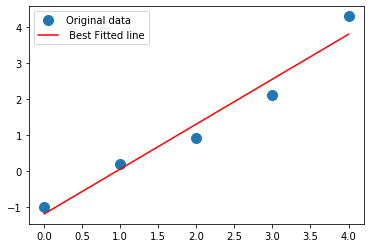

In [356]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label=" ""Best"" Fitted line")
plt.legend()
plt.show()

## Low rank  approximations of a matrix

In [357]:
%%latex
$$A= U . S . V^T $$  (eq 2)

<IPython.core.display.Latex object>

##### Let r be the rank of A, it emans that we have only r nonzero singular values, we can rewrite (eq 2) : 

In [364]:
%%latex
$$ A= \sum_{i=1}^{r}  s_i * u_i . v_i^T $$

<IPython.core.display.Latex object>

In [362]:
%%latex 
$$  u_i . v_i^T $$ is a MATRIX !
$$ s_i * u_i . v_i^T $$ is also a MATRIX !

<IPython.core.display.Latex object>

#### So if we cut  at "rank k, with k< r,
#### i.e.: we suppress/forget the smallest r-k singular  values
#### we have the rank k approximation of A defined by the "truncated" sum:

In [363]:
 %%latex
$$ A_k= \sum_{i=1}^{k}  s_i u_i . v_i^T $$

<IPython.core.display.Latex object>

####   See the file SVD_For_Image_Compression.ipynb for an example: compression of an image ...

## And to finish, a  example  of PCA= Principal Component Analysis

In [279]:
## See the documentation 
## https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

In [280]:
## Se also a very interesting example:
## https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html